In [22]:
# Import the necessary packages
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Import data
from dataset import X, Y

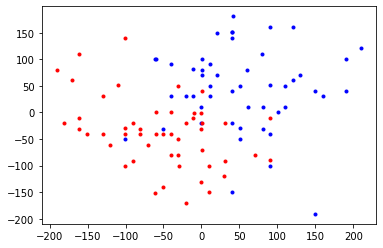

In [27]:
# Plot our input data which contains non linearly separable data using 2 random dimension 
plt.plot(X[2,:], X[30,:], 'b.')
plt.plot(Y[2,:], Y[30,:], 'r.')
plt.show()

In [28]:
# Define the variables
lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))

X2 = X[[2, 30], :]
Y2 = Y[[2, 30], :]

M = np.concatenate((X[[2, 30], :], -Y[[2, 30], :]), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [31]:
# Define the objective function
k = 3
C = 0.1
objective = cp.Minimize( -cp.sum(lambd) + 0.5*cp.quad_form(lambd, D) + (lambd[0]+gamma[0])**(k/(k-1))/(k * C)**(k/(k-1)) * (1-1/k))

# Define the constraints
constraints = [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0, lambd <= (lambd[0]+gamma[0]), lambd+gamma==C*np.ones(100)]

# Solve the problem using cvxpy
convexop_problem = cp.Problem(objective, constraints)
convexop_problem.solve(solver=cp.ECOS, verbose=False)

-3.2646810943890934

In [7]:
np.argpartition(lambd.value, 2)[0]

49

In [51]:
# Compute the parameters for the hyperplane from the lagrange multipliers
w = np.sum(np.multiply(lambd.value,M), axis=1)
b = 1 - (w.T@M[:,51])[0,0]

print("w = ", w)
print("b = ", b)

w =  [[0.02133614]
 [0.01598417]]
b =  -0.5435137478439853


In [50]:
# Finding the index of the support vectors
index = np.argmax(lambd.value)

# Rounding the Lagrange multipliers
lamb_round = np.round(lambd.value, 3)

# Printing the margin of the SVM at the support vectors
print("Margin of the SVM at the support vectors:")
for i in range(len(lamb_round)):
    if lamb_round[i] != 0.1 and lamb_round[i] > 0:
        margin = 1 - (w.T @ M[:, i])[0, 0]
        print("Support vector index", i, ":", margin)


Margin of the SVM at the support vectors:
Support vector index 31 : 0.2804542280359359
Support vector index 65 : -0.2806775658065841
Support vector index 96 : -0.28070335943629376


In [48]:
# Printing the Lagrange multipliers with rounded values
print("Lagrange multipliers:")
print(np.round(lambd.value, 3))


Lagrange multipliers:
[0.    0.1   0.1   0.    0.    0.    0.1   0.    0.    0.    0.    0.1
 0.    0.    0.    0.    0.    0.1   0.    0.    0.    0.1   0.    0.1
 0.1   0.    0.    0.    0.1   0.    0.    0.097 0.    0.1   0.    0.1
 0.1   0.    0.    0.1   0.    0.1   0.    0.    0.    0.1   0.    0.
 0.1   0.    0.1   0.    0.    0.    0.    0.1   0.1   0.    0.1   0.
 0.1   0.    0.    0.    0.1   0.007 0.1   0.    0.    0.1   0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.1   0.1   0.1   0.    0.
 0.1   0.    0.1   0.    0.    0.    0.    0.    0.    0.    0.1   0.1
 0.09  0.1   0.    0.   ]


In [15]:
# Points which lie far from the margin
np.where(lambd.value <= 0.1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

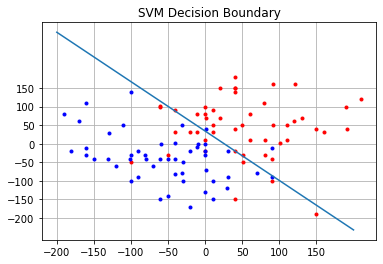

In [44]:
# Plotting the SVM Decision Boundary
i_feature1 = 0
i_feature2 = 1

# Plotting the data points of class 0 (red dots)
plt.plot(X2[i_feature1, :], X2[i_feature2, :], 'b.', label='blue')

# Plotting the data points of class 1 (blue dots)
plt.plot(Y2[i_feature1, :], Y2[i_feature2, :], 'r.', label='red')

# Generating x values for the decision boundary line
x = np.linspace(-200, 200, 100)

# Computing the corresponding y values for the decision boundary line
y = -(w[i_feature1, 0] * x + b) / w[i_feature2, 0]

# Plotting the decision boundary line
plt.plot(x, y, label='Decision Boundary')

# Setting the grid on the plot
plt.grid(True)

# Setting the x-axis and y-axis tick locations
plt.xticks(np.arange(-200, 200, 50))
plt.yticks(np.arange(-200, 200, 50))

# Adding a caption to the figure
plt.title("SVM Decision Boundary")

# Displaying the plot
plt.show()


In [46]:
# Printing SVM classifier values for data points of class 0
svm_values_class0 = w[i_feature1, 0] * X2[i_feature1, :] + w[i_feature2, 0] * X2[i_feature2, :] + b
print("SVM classifier values for blue data points:")
print(svm_values_class0)

# Printing SVM classifier values for data points of class 1
svm_values_class1 = w[i_feature1, 0] * Y2[i_feature1, :] + w[i_feature2, 0] * Y2[i_feature2, :] + b
print("SVM classifier values for red data points")
print(svm_values_class1)


SVM classifier values for blue data points:
[[ 1.98249106 -0.26897925 -0.38155281  3.31065908  0.48399125  2.02657667
  -0.2370037   3.22066998  3.36560215  0.75121093  1.06663422 -0.22794122
   1.32836704  4.59614624  0.73577341  2.20953511  2.62079451 -0.484853
   0.68653529  1.01169832  0.59670689 -0.91584294  3.3727204  -0.2826949
  -0.39447078  2.92643073  1.34454776  2.5685088   0.0528377   5.11836645
   1.12601955  0.17603202  2.99452556 -2.11383615  0.51544304 -0.22433264
  -0.01135006  4.17531496  0.91516341 -3.488595    3.95660453  0.03360939
   1.60876001  2.71874562  2.73527934 -2.08501733  2.28989646  0.97755619
  -0.88239243  5.87276459]]
SVM classifier values for red data points
[[-0.93378568 -2.0870275  -3.32451907 -2.63531315 -4.39449692 -0.06343493
  -0.55577306 -4.24956475 -1.30272149 -4.14112778 -0.33351282 -4.46241671
  -2.4779767  -3.34315343 -1.04222692 -1.82419131 -1.38577027 -2.20118513
  -3.97416786 -0.38973429 -2.75392741 -2.89990417 -2.72190458 -3.20041795
 

In [47]:
margin_size = 1 / np.linalg.norm(w)
print("Margin size in the SVM classifier:", margin_size)


Margin size in the SVM classifier: 37.51020359905798
